In [3]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel 
# pingouin fastapi pydantic streamlit uvicorn requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Carregar o dataset
df_salario = pd.read_csv('./datasets/dataset_salario.csv')

In [5]:
# Inspecionar a estrutura do dataframe
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [6]:
# Copiar o DF para o DF EDA
df_salario_eda = df_salario.copy()

In [7]:
# Copiar o DF para o DF Bucketing
df_salario_bucketing = df_salario.copy()

### EDA

In [8]:
# Visualizar os dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [9]:
# detectar valores ausents
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [10]:
# Medidas Estatísticas do DF
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

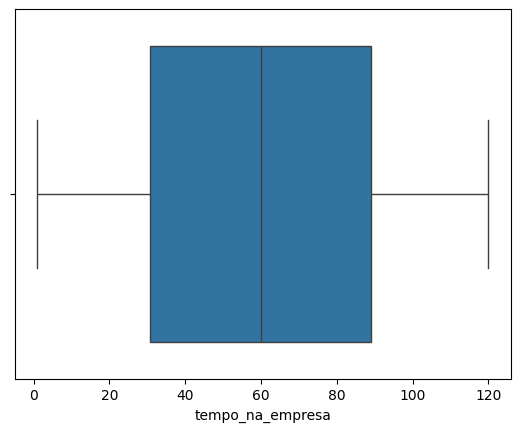

In [11]:
# Detectar outliers
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

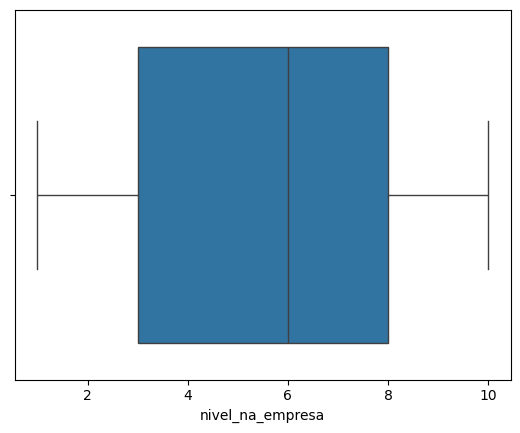

In [12]:
# Detectar outliers
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

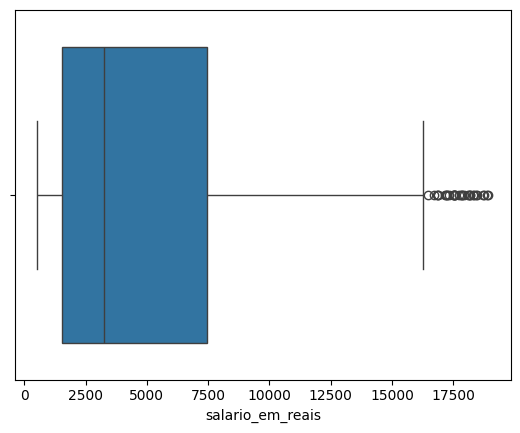

In [13]:
# Detectar outliers
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

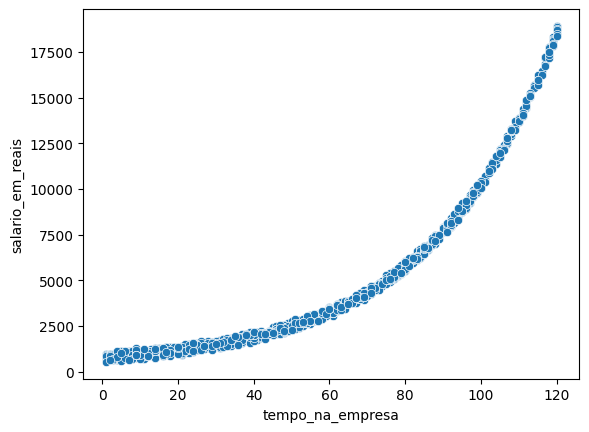

In [14]:
# Cruzamento das variaveis numericas com salarioem reais (variavel target)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

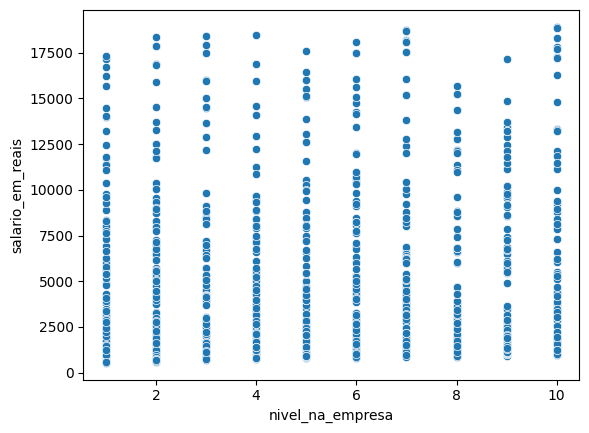

In [15]:
# Cruzamento das variaveis numericas com salarioem reais (variavel target)
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

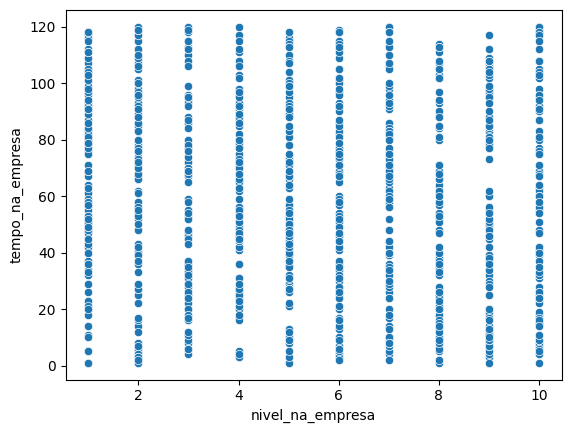

In [16]:

sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')